In [5]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_multi import  load_house_data, run_gradient_descent 
from lab_utils_multi import  norm_plot, plt_equal_scale, plot_cost_i_w
from lab_utils_common import dlc
np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')

In [7]:
X_train, y_train = load_house_data()
X_features = ['size(sqft)','bedrooms','floors','age']

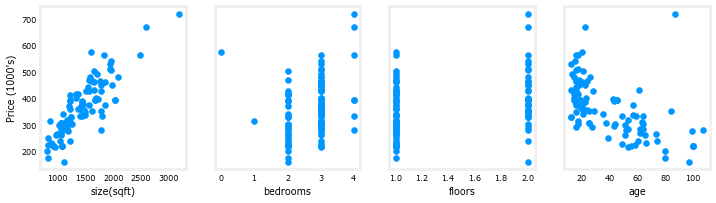

In [9]:
fig, ax =plt.subplots(1,4, figsize = (12,3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

空间越大价格越高，房间数量、楼层和价格没啥关系，越新的房子越贵

## Gradient Descent with Multiple Variables  
$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j = 0..n-1}\newline
&b\ \ := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3}
\end{align}
$$

## Learning Rate

In [10]:
#set alpha to 9.9e-7
_,_,hist = run_gradient_descent(X_train, y_train,alpha = 9.9e-7)
#it seems too high and doesn't converge

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 9.55884e+04  5.5e-01  1.0e-03  5.1e-04  1.2e-02  3.6e-04 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
      100 8.15254e+17  8.6e+05  1.6e+03  8.3e+02  2.0e+04  5.6e+02 -1.6e+12 -3.0e+09 -1.6e+09 -3.9e+10 -1.1e+09
      200 7.07001e+30  2.5e+12  4.7e+09  2.4e+09  6.0e+10  1.7e+09 -4.8e+18 -8.8e+15 -4.6e+15 -1.1e+17 -3.1e+15
      300 6.13122e+43  7.5e+18  1.4e+16  7.2e+15  1.8e+17  4.9e+15 -1.4e+25 -2.6e+22 -1.3e+22 -3.3e+23 -9.2e+21
      400 5.31709e+56  2.2e+25  4.0e+22  2.1e+22  5.2e+23  1.4e+22 -4.1e+31 -7.6e+28 -4.0e+28 -9.8e+29 -2.7e+28
      500 4.61107e+69  6.5e+31  1.2e+29  6.2e+28  1.5e+30  4.2e+28 -1.2e+38 -2.2e+35 -1.2e+35 -2.9e+36 -7.9e+34
      600 3.99879e+82  1.9e+38  3.5e+35  1.8e+35  4.5e+36  1.2e+35 -3.6e+44 -6.6e+41 -3.4e+41 -8.5e+42 -

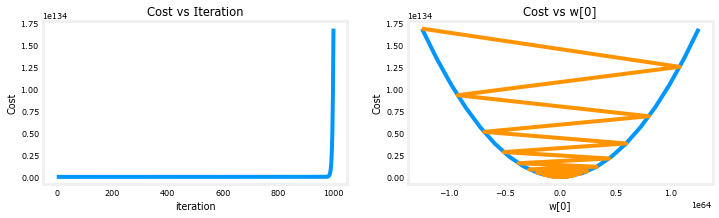

In [11]:
plot_cost_i_w(X_train, y_train, hist)
#overshooting

In [12]:
#set alpha to 9e-7
_,_,hist = run_gradient_descent(X_train, y_train,alpha = 9e-7)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 6.64616e+04  5.0e-01  9.1e-04  4.7e-04  1.1e-02  3.3e-04 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
      100 1.58690e+03  2.6e-01 -9.9e-05 -5.0e-04 -5.3e-02  5.7e-04 -1.4e+04 -2.0e+01 -5.5e+00  2.8e+02 -1.4e+01
      200 1.51091e+03  2.6e-01 -6.4e-04 -1.2e-03 -1.1e-01  1.0e-03 -3.9e+02  4.9e+00  7.8e+00  5.6e+02 -5.1e+00
      300 1.48390e+03  2.6e-01 -1.1e-03 -2.0e-03 -1.6e-01  1.4e-03 -2.2e+01  5.2e+00  8.1e+00  5.2e+02 -5.1e+00
      400 1.46102e+03  2.6e-01 -1.6e-03 -2.7e-03 -2.0e-01  1.9e-03 -1.2e+01  4.8e+00  8.0e+00  4.8e+02 -5.3e+00
      500 1.44160e+03  2.6e-01 -2.0e-03 -3.4e-03 -2.4e-01  2.4e-03 -1.1e+01  4.4e+00  8.0e+00  4.5e+02 -5.5e+00
      600 1.42513e+03  2.6e-01 -2.4e-03 -4.1e-03 -2.8e-01  2.9e-03 -9.7e+00  4.1e+00  7.9e+00  4.1e+02 -

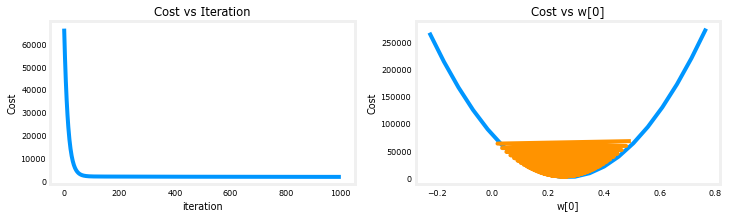

In [13]:
plot_cost_i_w(X_train, y_train, hist)

In [14]:
#set alpha to 1e-7
_,_,hist = run_gradient_descent(X_train, y_train,alpha = 1e-7)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 4.42313e+04  5.5e-02  1.0e-04  5.2e-05  1.2e-03  3.6e-05 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
      100 1.57604e+03  2.5e-01  4.0e-04  1.6e-04 -7.7e-04  2.1e-04 -1.6e+01  6.5e+00  8.3e+00  6.7e+02 -4.4e+00
      200 1.57164e+03  2.5e-01  3.3e-04  7.4e-05 -7.4e-03  2.5e-04 -1.6e+01  6.5e+00  8.3e+00  6.6e+02 -4.4e+00
      300 1.56732e+03  2.5e-01  2.7e-04 -8.5e-06 -1.4e-02  3.0e-04 -1.6e+01  6.4e+00  8.3e+00  6.5e+02 -4.4e+00
      400 1.56308e+03  2.5e-01  2.0e-04 -9.1e-05 -2.0e-02  3.4e-04 -1.5e+01  6.4e+00  8.3e+00  6.5e+02 -4.5e+00
      500 1.55891e+03  2.5e-01  1.4e-04 -1.7e-04 -2.7e-02  3.9e-04 -1.5e+01  6.3e+00  8.3e+00  6.4e+02 -4.5e+00
      600 1.55483e+03  2.5e-01  7.9e-05 -2.6e-04 -3.3e-02  4.3e-04 -1.5e+01  6.2e+00  8.3e+00  6.4e+02 -

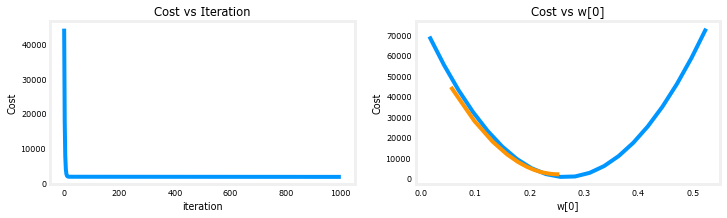

In [15]:
plot_cost_i_w(X_train,y_train,hist)

## Feature Scaling

In [16]:
def zscore_normalize_features(X):
    mu = np.mean(X,axis = 0)#shape: (n,)
    sigma = np.std(X,axis = 0)
    X_norm = (X - mu)/ sigma
    return (X_norm, mu, sigma)

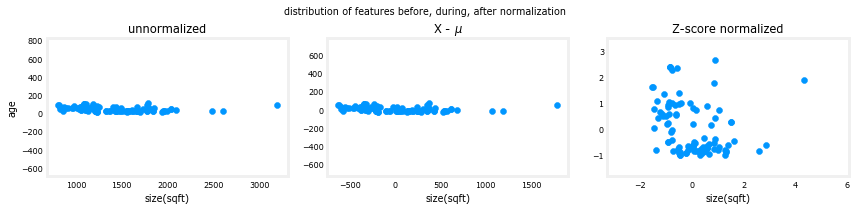

In [17]:
mu     = np.mean(X_train,axis=0)   
sigma  = np.std(X_train,axis=0) 
X_mean = (X_train - mu)
X_norm = (X_train - mu)/sigma      

fig,ax=plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(X_train[:,0], X_train[:,3])
ax[0].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_mean[:,0], X_mean[:,3])
ax[1].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

ax[2].scatter(X_norm[:,0], X_norm[:,3])
ax[2].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[2].set_title(r"Z-score normalized")
ax[2].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()

In [18]:
# normalize the original features
X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

X_mu = [1.42e+03 2.72e+00 1.38e+00 3.84e+01], 
X_sigma = [411.62   0.65   0.49  25.78]
Peak to Peak range by column in Raw        X:[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to Peak range by column in Normalized X:[5.85 6.14 2.06 3.69]


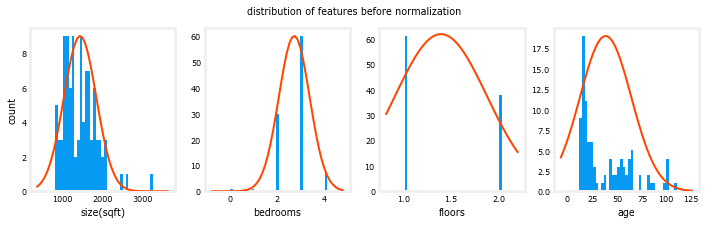

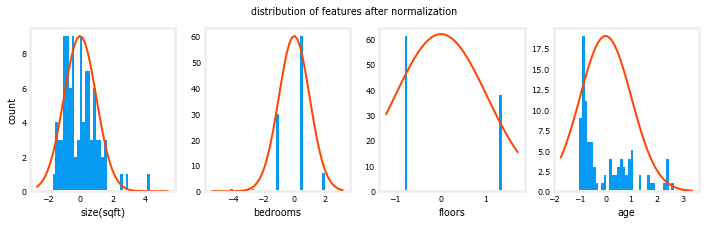

In [19]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
    norm_plot(ax[i],X_train[:,i],)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count");
fig.suptitle("distribution of features before normalization")
plt.show()
fig,ax=plt.subplots(1,4,figsize=(12,3))
for i in range(len(ax)):
    norm_plot(ax[i],X_norm[:,i],)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count"); 
fig.suptitle("distribution of features after normalization")

plt.show()
#归一化数据（x轴）的范围以零为中心，大约+/- 2

In [20]:
w_norm, b_norm, hist = run_gradient_descent(X_norm, y_train, 1000, 1.0e-1, )

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 5.76170e+04  8.9e+00  3.0e+00  3.3e+00 -6.0e+00  3.6e+01 -8.9e+01 -3.0e+01 -3.3e+01  6.0e+01 -3.6e+02
      100 2.21086e+02  1.1e+02 -2.0e+01 -3.1e+01 -3.8e+01  3.6e+02 -9.2e-01  4.5e-01  5.3e-01 -1.7e-01 -9.6e-03
      200 2.19209e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.0e-02  1.5e-02  1.7e-02 -6.0e-03 -2.6e-07
      300 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -1.0e-03  5.1e-04  5.7e-04 -2.0e-04 -6.9e-12
      400 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.4e-05  1.7e-05  1.9e-05 -6.6e-06 -2.7e-13
      500 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -1.1e-06  5.6e-07  6.2e-07 -2.2e-07 -2.6e-13
      600 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.7e-08  1.9e-08  2.1e-08 -7.3e-09 -

速度很快！

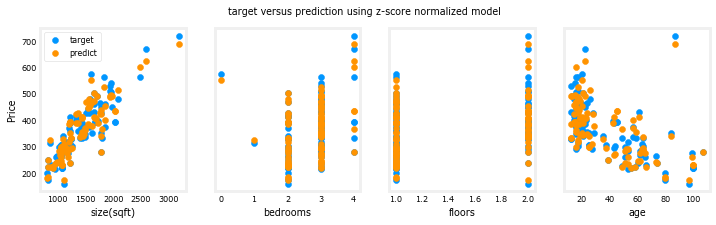

In [21]:
#predict target using normalized features
m = X_norm.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(X_norm[i], w_norm) + b_norm

    # plot predictions and targets versus original features    
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],yp,color=dlc["dlorange"], label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

In [22]:
# First, normalize out example.
x_house = np.array([1200, 3, 1, 40])
x_house_norm = (x_house - X_mu) / X_sigma
print(x_house_norm)
x_house_predict = np.dot(x_house_norm, w_norm) + b_norm
print(f" predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = ${x_house_predict*1000:0.0f}")

[-0.53  0.43 -0.79  0.06]
 predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = $318709


## **Cost Contours**  

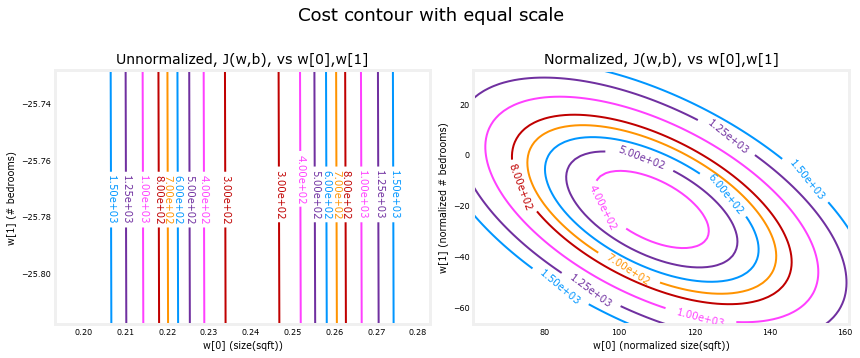

In [23]:
plt_equal_scale(X_train, X_norm, y_train)